In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

df = pd.read_csv("../data/processed/final.csv")
df.head()

,Customer_ID,Age,Gender,Annual_Income,Total_Spend,Years_as_Customer,Num_of_Purchases,Average_Transaction_Amount,Num_of_Returns,Num_of_Support_Contacts,Satisfaction_Score,Last_Purchase_Days_Ago,Email_Opt_In,Promotion_Response,Target_Churn
0,1,62,Other,45.15,5892.58,5,22,453.80,2,0,3,129,True,Responded,True
1,2,65,Male,79.51,9025.47,13,77,22.90,2,2,3,227,False,Responded,False
2,3,18,Male,29.19,618.83,13,71,50.53,5,2,2,283,False,Responded,True
3,4,21,Other,79.63,9110.30,3,33,411.83,5,3,5,226,True,Ignored,True
4,5,21,Other,77.66,5390.88,15,43,101.19,3,0,5,242,False,Unsubscribed,False


In [2]:
print("Shape:", df.shape)
print("Columns:")
for c in df.columns:
    print("-", c)


Shape: (1000, 15)
Columns:
- Customer_ID
- Age
- Gender
- Annual_Income
- Total_Spend
- Years_as_Customer
- Num_of_Purchases
- Average_Transaction_Amount
- Num_of_Returns
- Num_of_Support_Contacts
- Satisfaction_Score
- Last_Purchase_Days_Ago
- Email_Opt_In
- Promotion_Response
- Target_Churn


In [3]:
df.dtypes


Customer_ID                     int64
Age                             int64
Gender                         object
Annual_Income                 float64
Total_Spend                   float64
Years_as_Customer               int64
Num_of_Purchases                int64
Average_Transaction_Amount    float64
Num_of_Returns                  int64
Num_of_Support_Contacts         int64
Satisfaction_Score              int64
Last_Purchase_Days_Ago          int64
Email_Opt_In                     bool
Promotion_Response             object
Target_Churn                     bool
dtype: object

In [4]:
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_cols = df.select_dtypes(include=["object", "bool"]).columns.tolist()

numeric_cols, categorical_cols


(['Customer_ID',
  'Age',
  'Annual_Income',
  'Total_Spend',
  'Years_as_Customer',
  'Num_of_Purchases',
  'Average_Transaction_Amount',
  'Num_of_Returns',
  'Num_of_Support_Contacts',
  'Satisfaction_Score',
  'Last_Purchase_Days_Ago'],
 ['Gender', 'Email_Opt_In', 'Promotion_Response', 'Target_Churn'])

In [5]:
df.isnull().sum()

Customer_ID                   0
Age                           0
Gender                        0
Annual_Income                 0
Total_Spend                   0
Years_as_Customer             0
Num_of_Purchases              0
Average_Transaction_Amount    0
Num_of_Returns                0
Num_of_Support_Contacts       0
Satisfaction_Score            0
Last_Purchase_Days_Ago        0
Email_Opt_In                  0
Promotion_Response            0
Target_Churn                  0
dtype: int64

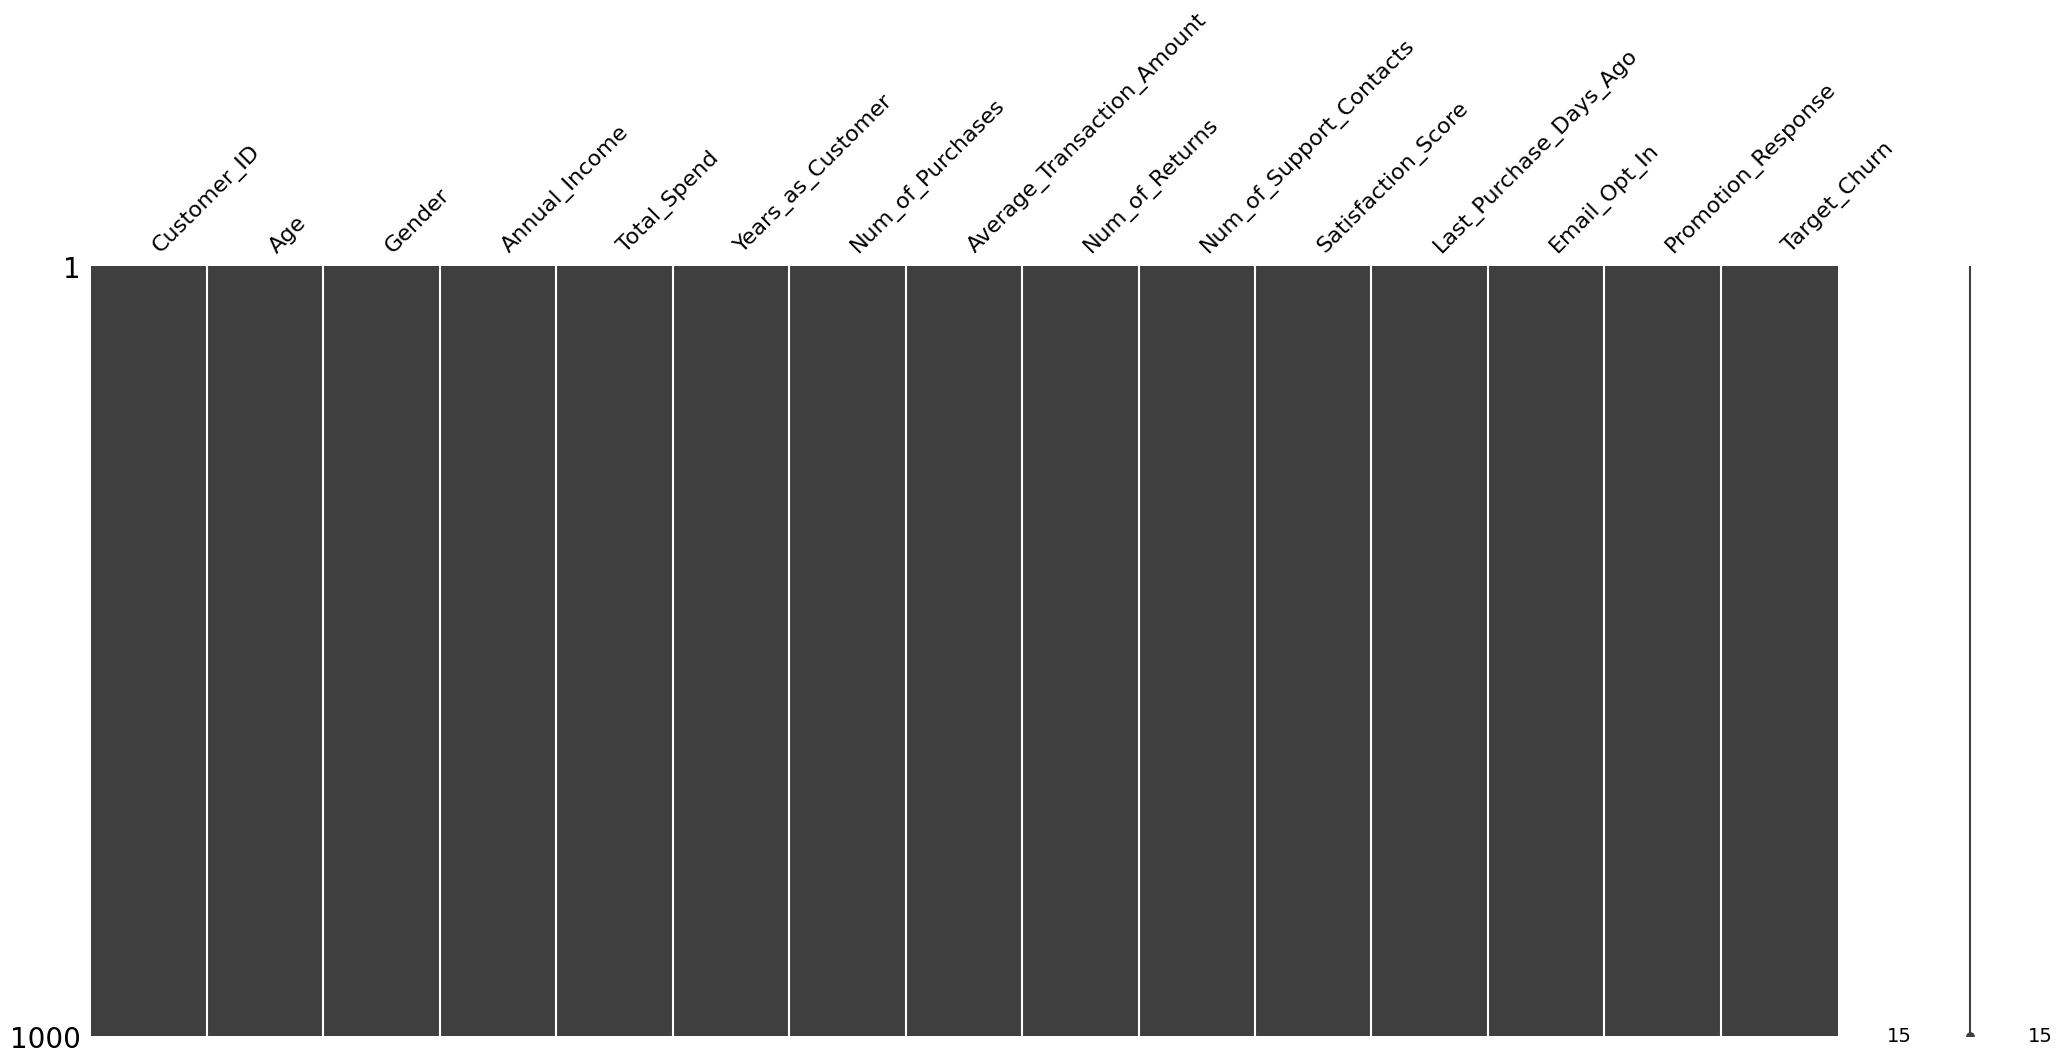

In [6]:
msno.matrix(df)
plt.show()

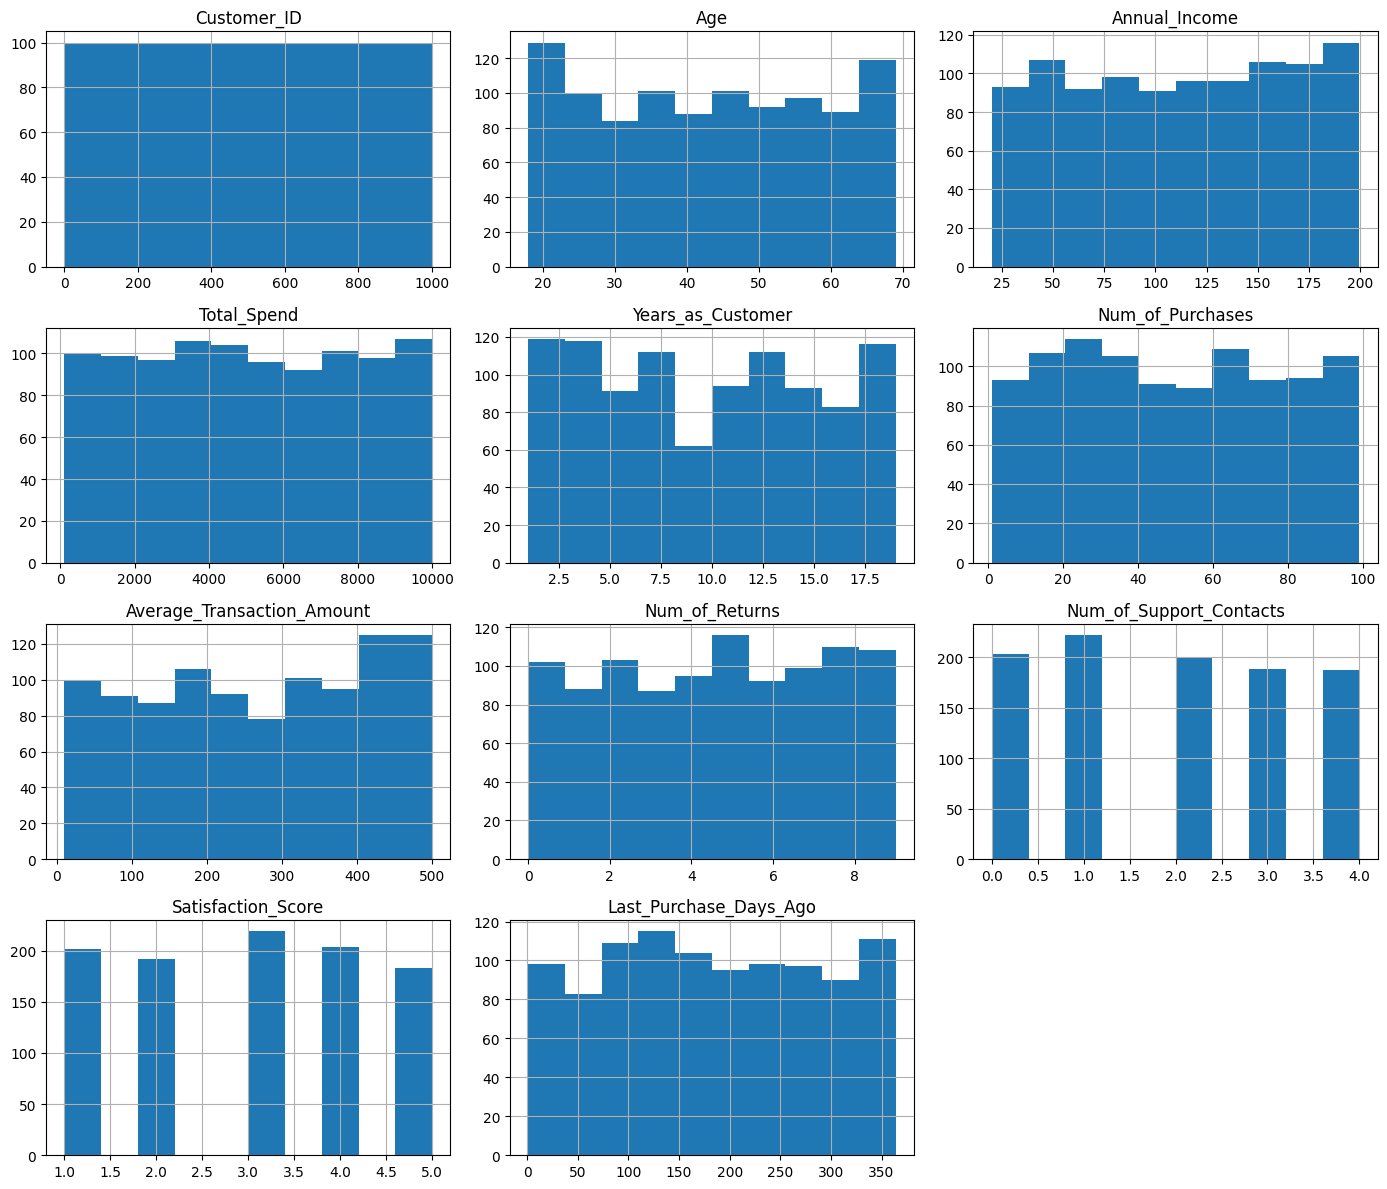

In [7]:
if numeric_cols:
    df[numeric_cols].hist(figsize=(14,12))
    plt.tight_layout()
    plt.show()

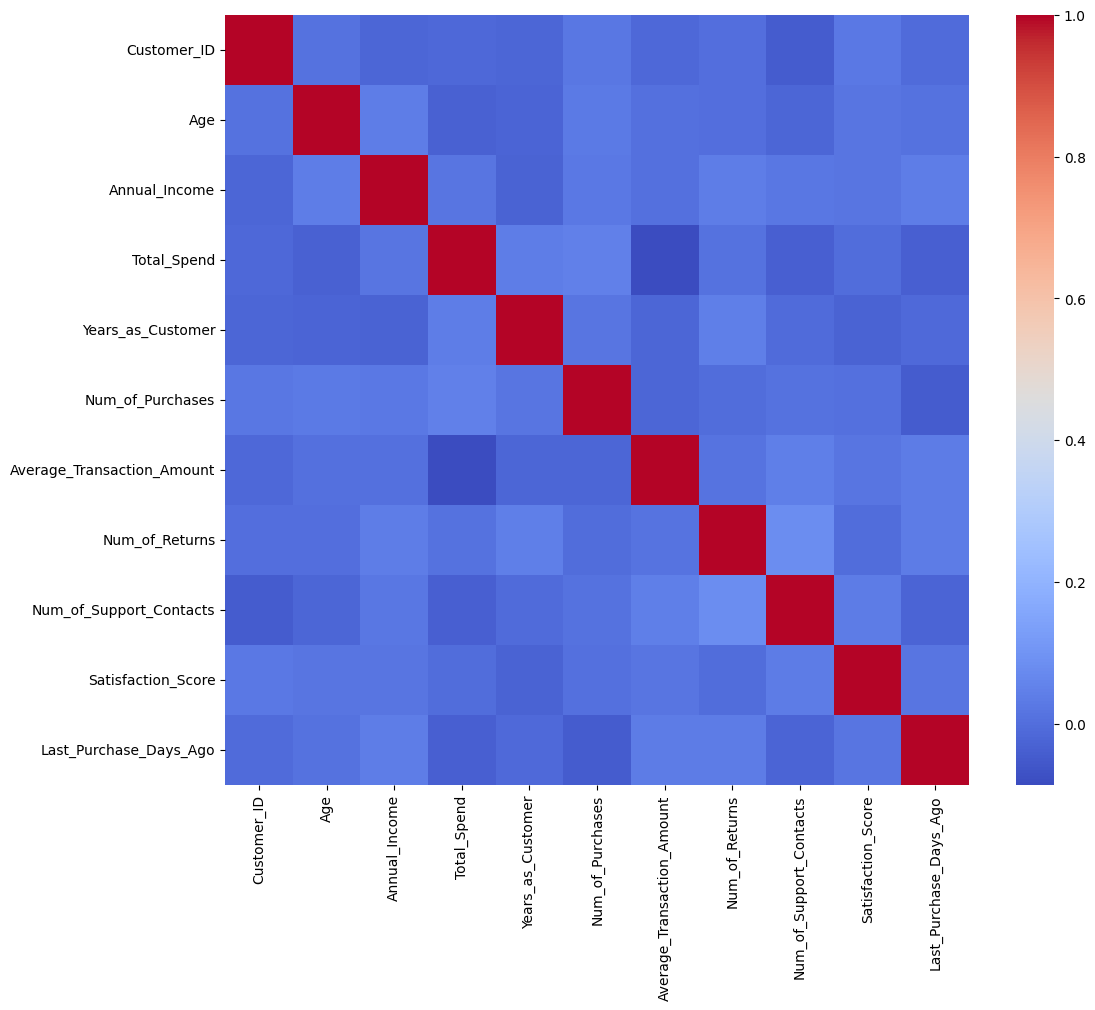

In [8]:
if len(numeric_cols) > 1:
    plt.figure(figsize=(12,10))
    sns.heatmap(df[numeric_cols].corr(), cmap="coolwarm")
    plt.show()


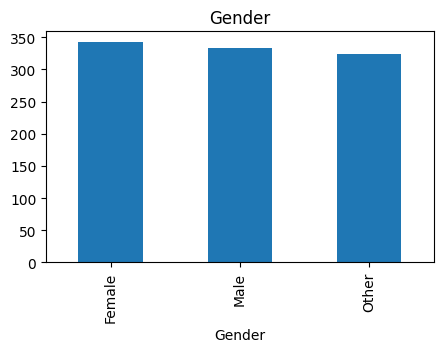

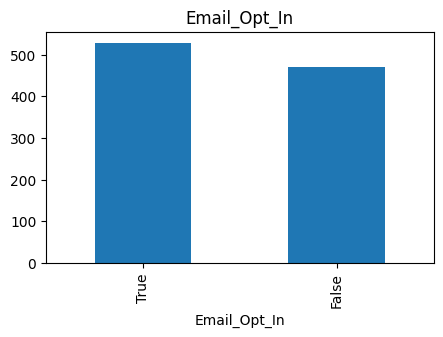

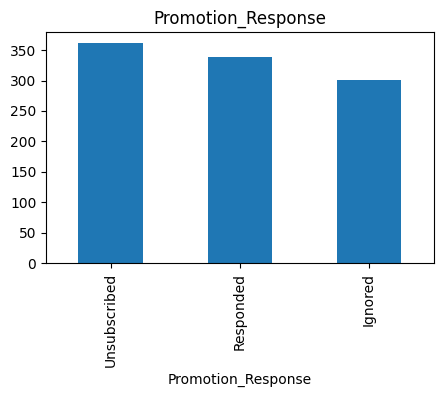

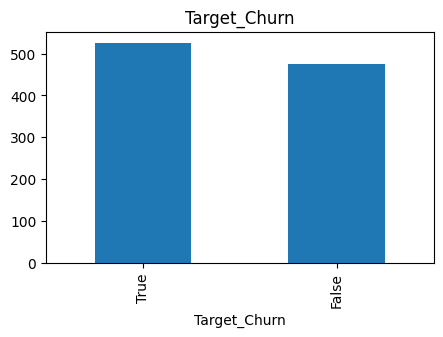

In [9]:
for col in categorical_cols:
    plt.figure(figsize=(5,3))
    df[col].value_counts().plot(kind="bar")
    plt.title(col)
    plt.show()


In [10]:
possible_targets = ["Churn", "churn", "Exited", "Target"]

found = [c for c in df.columns if c in possible_targets]

if found:
    sns.countplot(x=found[0], data=df)
    plt.show()
else:
    print("No explicit churn/target column found.")


No explicit churn/target column found.
